In [1]:
# Anomaly detection using neural networks is modeled in an unsupervised manner.
#Long Short-Term Memory (LSTM) neural network model is used to identify anomalies.
#LSTM networks are a sub-type of the more general Recurrent Neural Networks (RNN).
#The goal is to predict future beehive failures before they happen

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from datetime import datetime
# import libraries
import os
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import matplotlib.dates as md
from matplotlib.dates import DateFormatter
from matplotlib import rc
%matplotlib inline

from numpy.random import seed
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers


from pandas.plotting import autocorrelation_plot as auto_corr

# To plot
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

#For date-time
import math
from datetime import datetime
from datetime import timedelta

# Another imports if needs
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima


import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:00


In [3]:
# set random seed
seed(10)
tf.random.set_seed(10)

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Reading the Data

In [4]:
data = pd.read_csv('../input/walmartcleaned/walmart_cleaned.csv')
data.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


## Description 

In [5]:
data.describe().round().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                            .background_gradient(subset=['50%'], cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,421570.000000,211611.000000,122195.000000,0.000000,105782.000000,211604.000000,317425.000000,423285.000000
Store,421570.000000,22.000000,13.000000,1.000000,11.000000,22.000000,33.000000,45.000000
IsHoliday,421570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
Dept,421570.000000,44.000000,30.000000,1.000000,18.000000,37.000000,74.000000,99.000000
Weekly_Sales,421570.000000,15981.000000,22711.000000,-4989.000000,2080.000000,7612.000000,20206.000000,693099.000000
Temperature,421570.000000,60.000000,18.000000,-2.000000,47.000000,62.000000,74.000000,100.000000
Fuel_Price,421570.000000,3.000000,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000
MarkDown1,421570.000000,2590.000000,6052.000000,0.000000,0.000000,0.000000,2809.000000,88647.000000
MarkDown2,421570.000000,880.000000,5085.000000,-266.000000,0.000000,0.000000,2.000000,104520.000000
MarkDown3,421570.000000,468.000000,5529.000000,-29.000000,0.000000,0.000000,5.000000,141631.000000


In [6]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
store_dept_table = pd.pivot_table(data, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Dept,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,90.0,91.0,92.0,93.0,94.0,95.0,96.0,97.0,98.0,99.0
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


In [8]:
data.loc[data['Weekly_Sales']<=0]

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
182,182,1,2010-02-19,0,47.0,-863.00,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,3,151315
429,429,1,2010-03-12,0,47.0,-698.00,57.79,2.667,0.00,0.00,0.00,0.00,0.00,211.380643,8.106,3,151315
2555,2555,1,2010-10-08,0,47.0,-58.00,63.93,2.633,0.00,0.00,0.00,0.00,0.00,211.746754,7.838,3,151315
3632,3632,1,2011-01-21,0,54.0,-50.00,44.04,3.016,0.00,0.00,0.00,0.00,0.00,211.827234,7.742,3,151315
4109,4109,1,2011-03-11,0,47.0,0.00,53.56,3.459,0.00,0.00,0.00,0.00,0.00,214.111056,7.742,3,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420031,421747,45,2012-05-25,0,49.0,-4.97,67.21,3.798,5370.39,0.00,361.22,1287.62,2461.81,191.002810,8.567,2,118221
420370,422086,45,2012-06-29,0,49.0,-34.00,75.22,3.506,3291.36,425.60,0.00,314.88,2255.34,191.099246,8.567,2,118221
420736,422452,45,2012-08-03,0,49.0,-1.91,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,2,118221
421016,422732,45,2012-08-31,0,54.0,0.00,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,2,118221


In [9]:
data2 = data.loc[data['Weekly_Sales'] > 0]

In [10]:
data2['Date'].head(5).append(data2['Date'].tail(5)) # to see first and last 5 rows

0        2010-02-05
1        2010-02-05
2        2010-02-05
3        2010-02-05
4        2010-02-05
421565   2012-10-26
421566   2012-10-26
421567   2012-10-26
421568   2012-10-26
421569   2012-10-26
Name: Date, dtype: datetime64[ns]

<AxesSubplot:xlabel='IsHoliday', ylabel='Weekly_Sales'>

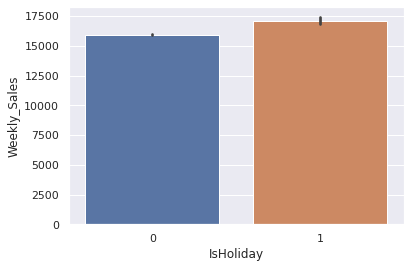

In [11]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=data2)

In [12]:
df= data2.copy()

In [13]:
df.set_index('Date', inplace=True)

In [14]:
df1 = df.resample('W-MON').sum()
#df.resample('W-MON')
#.interpolate()[::7]

In [15]:
df1

,Unnamed: 0,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Date,,,,,,,,,,,,,,,,
2010-02-08,604946596,64931,0,130099.0,49750875.98,98051.13,8007.134,0.00,0.00,0.00,0.00,0.00,492949.905535,25272.533,7106,404726444
2010-02-15,604785266,64897,2949,130734.0,48336800.10,98409.44,7950.372,0.00,0.00,0.00,0.00,0.00,493668.382611,25266.603,7122,406003811
2010-02-22,610391383,65472,0,131534.0,48277902.33,109986.81,7940.313,0.00,0.00,0.00,0.00,0.00,497137.036639,25466.540,7164,407715096
2010-03-01,603712495,64742,0,129533.0,43970440.65,113556.93,7895.330,0.00,0.00,0.00,0.00,0.00,493062.204817,25172.556,7092,403855974
2010-03-08,604069157,64757,0,129242.0,46872715.16,124390.95,8020.926,0.00,0.00,0.00,0.00,0.00,492308.584801,25172.941,7088,403865218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-01,638518858,65617,0,130183.0,43735713.56,201219.39,11388.865,14451609.34,56298.54,15491.09,5020072.96,12536021.25,519503.517745,21320.389,7099,401708549
2012-10-08,642393763,65995,0,132042.0,47567053.49,194107.46,11414.187,14962702.47,0.00,59307.01,8336451.60,10745961.80,522037.213368,20586.126,7145,404910680
2012-10-15,644098516,66145,0,132786.0,46128909.98,171823.03,11609.130,5827442.08,0.00,49975.57,1659507.32,16708284.32,524784.698226,20701.180,7169,405992240


In [16]:
data2.set_index('Date', inplace=True)

In [17]:
df_Store1 =data2[data2['Store']==1].resample('W-MON').sum().drop(['Unnamed: 0', 'Store','Dept','Type','IsHoliday'],axis=1)

In [18]:
df_Store1
train = df_Store1.copy()

In [19]:
# Standerized the data using Standers Scalar Scaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df_Store1)

In [20]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10
0,0.305113,0.143964,0.065123,0.000000,0.000000,0.000000,0.000000,0.000000,0.479955,1.000000,0.8
1,0.303495,0.064901,0.023625,0.000000,0.000000,0.000000,0.000000,0.000000,0.363631,0.935181,0.6
2,0.276300,0.090489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.365592,0.935181,0.6
3,0.086670,0.211220,0.032658,0.000000,0.000000,0.000000,0.000000,0.000000,0.366865,0.935181,0.6
4,0.222125,0.220515,0.102462,0.000000,0.000000,0.000000,0.000000,0.000000,0.490698,1.000000,0.8
...,...,...,...,...,...,...,...,...,...,...,...
138,0.112189,0.760939,0.835851,0.107505,0.000166,0.000030,0.044367,0.231707,0.983083,0.300676,0.8
139,0.330411,0.606211,0.766423,0.233620,0.000000,0.000322,0.111636,0.174672,0.862121,0.052561,0.6
140,0.239180,0.521786,0.790058,0.061172,0.000000,0.000145,0.018847,0.289444,1.000000,0.105122,0.8
141,0.178488,0.578748,0.715757,0.027103,0.000000,0.000086,0.002442,0.109863,0.742756,0.000000,0.4


In [21]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True, 
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)    
    model = Model(inputs=inputs, outputs=output)
    return model

In [22]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X.reshape(X.shape[0], 1, X.shape[1])

In [23]:
X_train

array([[[0.30511304, 0.14396442, 0.06512319, ..., 0.47995515,
         1.        , 0.8       ]],

       [[0.30349457, 0.06490074, 0.02362501, ..., 0.3636306 ,
         0.93518052, 0.6       ]],

       [[0.27630047, 0.09048863, 0.        , ..., 0.36559182,
         0.93518052, 0.6       ]],

       ...,

       [[0.23917958, 0.52178625, 0.79005781, ..., 1.        ,
         0.10512175, 0.8       ]],

       [[0.17848775, 0.57874834, 0.71575676, ..., 0.74275638,
         0.        , 0.4       ]],

       [[0.16503458, 0.61720275, 0.68929443, ..., 0.87309211,
         0.05256087, 0.6       ]]])

In [24]:
# create the autoencoder model
model = autoencoder_model(X_train)
model.compile(optimizer='adam', loss='mae')
model.summary()

2022-06-01 17:59:03.755423: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 11)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 1, 16)             1792      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 336       
_________________________________________________________________
repeat_vector (RepeatVector) (None, 1, 4)              0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 4)              144       
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 16)             1344      
_________________________________________________________________
time_distributed (TimeDistri (None, 1, 11)             187   

In [25]:
# fit the model to the data
nb_epochs = 100
batch_size = 10
history = model.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size, validation_split=0.05).history

Epoch 1/100


2022-06-01 17:59:04.267649: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


14/14 [==============================] - 7s 81ms/step - loss: 0.2797 - val_loss: 0.3333
Epoch 2/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2718 - val_loss: 0.3257
Epoch 3/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2640 - val_loss: 0.3177
Epoch 4/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2561 - val_loss: 0.3096
Epoch 5/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2480 - val_loss: 0.3018
Epoch 6/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2396 - val_loss: 0.2931
Epoch 7/100
14/14 [==============================] - 0s 9ms/step - loss: 0.2304 - val_loss: 0.2835
Epoch 8/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2200 - val_loss: 0.2731
Epoch 9/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2085 - val_loss: 0.2606
Epoch 10/100
14/14 [==============================] - 0s 9ms/step - loss: 0.1949 - val_loss: 0.2445
Epoch 11/100
14/14

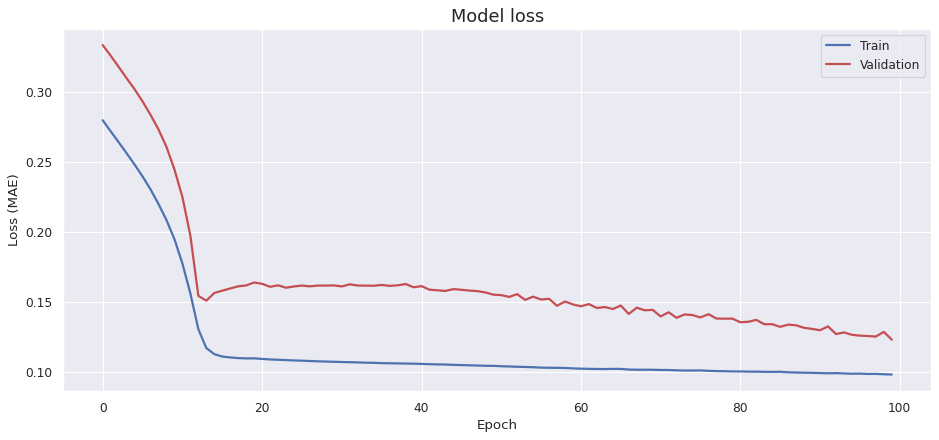

In [26]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (MAE)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

(0.0, 0.13)

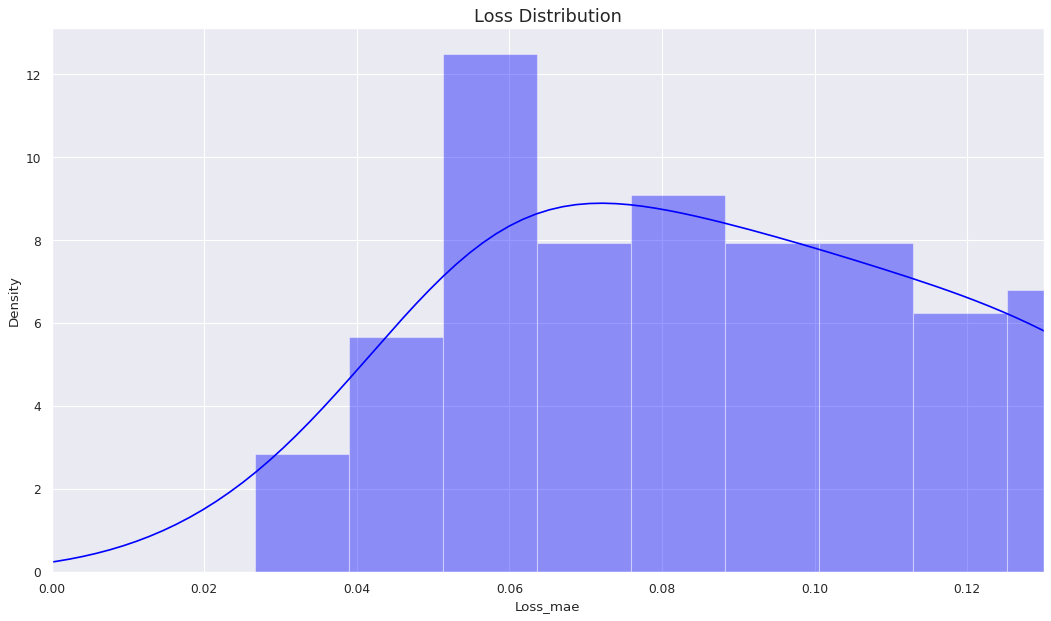

In [27]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
plt.xlim([0.0,.13])

In [28]:
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
X_train1 = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-X_train1), axis = 1)
scored['Threshold'] = 0.11
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']

anomalies = scored[scored.Anomaly == True]
anomalies.head(20)

,Loss_mae,Threshold,Anomaly
Date,,,
2010-02-08,0.143972,0.11,True
2010-02-15,0.126376,0.11,True
2010-02-22,0.124321,0.11,True
2010-03-08,0.126541,0.11,True
2010-06-21,0.112635,0.11,True
2010-12-27,0.147064,0.11,True
2011-06-06,0.120899,0.11,True
2011-07-04,0.114381,0.11,True
2011-07-11,0.115739,0.11,True


(array([2093, 2140, 2192, 2235]),
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

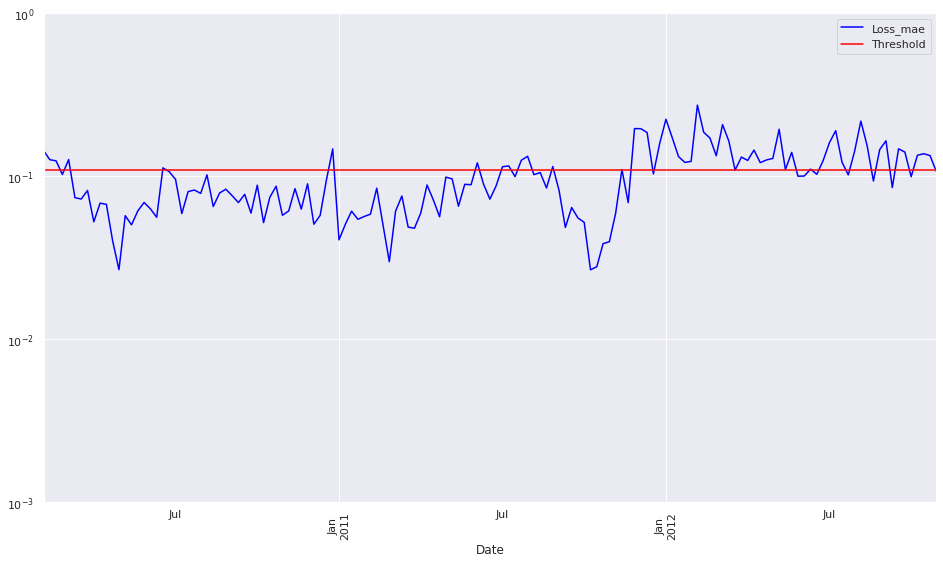

In [29]:
# plot bearing failure time plot
scored.plot(logy=True,  figsize=(16,9), ylim=[1e-3,1e-0], color=['blue','red'])
plt.xticks(rotation=90)